In [3]:
import pandas as pd

In [4]:
df=pd.read_excel("Online Retail.xlsx")

In [5]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [6]:
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [9]:
from sklearn.cluster import KMeans

In [10]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [35]:
df=df.dropna()
df.shape

(406829, 10)

In [12]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [13]:
df.CustomerID=df['CustomerID'].astype(str)
df['amount']=df['Quantity']*df['UnitPrice']
rfm_df=df.groupby('CustomerID')['amount'].sum()
rfm_df.reset_index()
rfm_df.columns=['CustomerID','amount']
rfm_df

CustomerID
12346.0       0.00
12347.0    4310.00
12348.0    1797.24
12349.0    1757.55
12350.0     334.40
            ...   
18280.0     180.60
18281.0      80.82
18282.0     176.60
18283.0    2094.88
18287.0    1837.28
Name: amount, Length: 4372, dtype: float64

In [14]:
rfm_f=df.groupby('CustomerID')['InvoiceNo'].count()
rfm_f=rfm_f.reset_index()
rfm_f.columns=['CustomerID','freq']
rfm_f

,CustomerID,freq
0,12346.0,2
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17
...,...,...
4367,18280.0,10
4368,18281.0,7
4369,18282.0,13
4370,18283.0,756


In [15]:
df['InvoiceDate']=pd.to_datetime(df['InvoiceDate'],format='%d-%m-%Y %H:%M')
max_date=max(df['InvoiceDate'])
df['diff']=max_date-df['InvoiceDate']
rfm_p=df.groupby('CustomerID')['diff'].min()
rfm_p=rfm_p.reset_index()
rfm_p.columns=['CustomerID','diff']
rfm_p['diff']=rfm_p['diff'].dt.days
rfm_p

,CustomerID,diff
0,12346.0,325
1,12347.0,1
2,12348.0,74
3,12349.0,18
4,12350.0,309
...,...,...
4367,18280.0,277
4368,18281.0,180
4369,18282.0,7
4370,18283.0,3


In [16]:
rfm_final=pd.merge(rfm_f,rfm_df,on='CustomerID',how='inner')
rfm_final=pd.merge(rfm_final,rfm_p,on='CustomerID',how='inner')
rfm_final.columns=['CustomerID','Amount','Frequency','Recency']
rfm_final.head()

,CustomerID,Amount,Frequency,Recency
0,12346.0,2,0.00,325
1,12347.0,182,4310.00,1
2,12348.0,31,1797.24,74
3,12349.0,73,1757.55,18
4,12350.0,17,334.40,309


<AxesSubplot:>

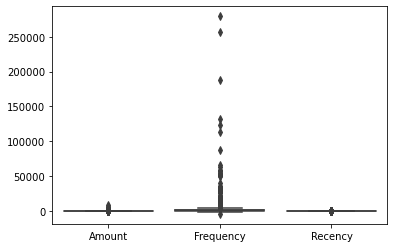

In [17]:
sns.boxplot(data=rfm_final)

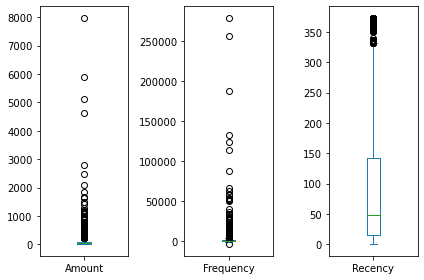

In [18]:
rfm_final.plot(kind='box',subplots=True)
plt.tight_layout()

In [19]:
q1=rfm_final.Amount.quantile(0.05)
q3=rfm_final.Amount.quantile(0.95)
IQR=q3-q1
rfm_final=rfm_final[(rfm_final.Amount>= q1 - 1.5*IQR) & (rfm_final.Amount <= q3 + 1.5*IQR)]
rfm_final

,CustomerID,Amount,Frequency,Recency
0,12346.0,2,0.00,325
1,12347.0,182,4310.00,1
2,12348.0,31,1797.24,74
3,12349.0,73,1757.55,18
4,12350.0,17,334.40,309
...,...,...,...,...
4367,18280.0,10,180.60,277
4368,18281.0,7,80.82,180
4369,18282.0,13,176.60,7
4370,18283.0,756,2094.88,3


In [20]:

q1=rfm_final.Recency.quantile(0.05)
q3=rfm_final.Recency.quantile(0.95)
IQR=q3-q1
rfm_final=rfm_final[(rfm_final.Recency>= q1 - 1.5*IQR) & (rfm_final.Recency <= q3 + 1.5*IQR)]
rfm_final


,CustomerID,Amount,Frequency,Recency
0,12346.0,2,0.00,325
1,12347.0,182,4310.00,1
2,12348.0,31,1797.24,74
3,12349.0,73,1757.55,18
4,12350.0,17,334.40,309
...,...,...,...,...
4367,18280.0,10,180.60,277
4368,18281.0,7,80.82,180
4369,18282.0,13,176.60,7
4370,18283.0,756,2094.88,3


In [21]:
q1=rfm_final.Frequency.quantile(0.05)
q3=rfm_final.Frequency.quantile(0.95)
IQR=q3-q1
rfm_final=rfm_final[(rfm_final.Frequency>= q1 - 1.5*IQR) & (rfm_final.Frequency<= q3 + 1.5*IQR)]
rfm_final

,CustomerID,Amount,Frequency,Recency
0,12346.0,2,0.00,325
1,12347.0,182,4310.00,1
2,12348.0,31,1797.24,74
3,12349.0,73,1757.55,18
4,12350.0,17,334.40,309
...,...,...,...,...
4367,18280.0,10,180.60,277
4368,18281.0,7,80.82,180
4369,18282.0,13,176.60,7
4370,18283.0,756,2094.88,3


In [22]:
rfm_final.shape

(4290, 4)

Amount          AxesSubplot(0.125,0.125;0.227941x0.755)
Frequency    AxesSubplot(0.398529,0.125;0.227941x0.755)
Recency      AxesSubplot(0.672059,0.125;0.227941x0.755)
dtype: object

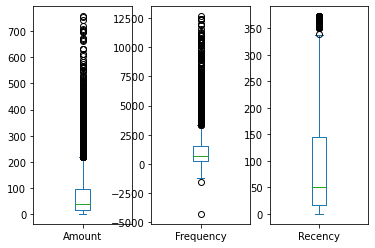

In [23]:
rfm_final.plot(kind='box',subplots=True)

In [24]:
from sklearn.preprocessing import MinMaxScaler
x=rfm_final[["Amount","Frequency","Recency"]]
scaler=MinMaxScaler()
rfm_scaled=scaler.fit_transform(x)


In [25]:
rfm_scaled=pd.DataFrame(rfm_scaled)
rfm_scaled.columns=['Amount','Frequency','Recency']
rfm_scaled.head()

,Amount,Frequency,Recency
0,0.001323,0.253141,0.871314
1,0.239418,0.507603,0.002681
2,0.039683,0.359250,0.198391
3,0.095238,0.356907,0.048257
4,0.021164,0.272884,0.828418


In [26]:
kmeans=KMeans(n_clusters=3,random_state=50)
kmeans.fit(rfm_scaled)
lbs=kmeans.labels_
kmeans.labels_

array([0, 2, 1, ..., 1, 2, 1])

In [27]:
wss=[]
for i in range(1,11):
   kmeans=KMeans(n_clusters=i,random_state=50)
   kmeans.fit(rfm_scaled)
   wss.append(kmeans.inertia_)
wss

[433.61296950907933,
 174.38380590863994,
 112.0625725302119,
 79.2379935497894,
 64.47636437170148,
 53.64219306983672,
 47.22786129301701,
 41.073213893749866,
 36.65091535644191,
 33.43630737390595]

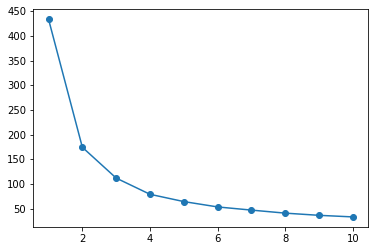

In [28]:
plt.plot(range(1,11),wss,marker='o')


In [29]:
from sklearn.metrics import silhouette_score
ss=[]
for i in range(2,11):
    km2=KMeans(n_clusters=i,random_state=42)
    km2.fit(rfm_scaled)
    ss.append(silhouette_score(rfm_scaled,km2.labels_))

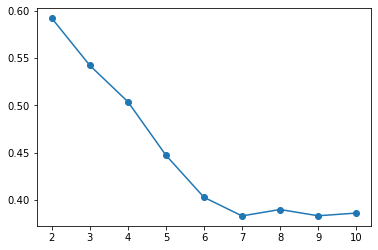

In [30]:
plt.plot(range(2,11), ss, marker='o')

In [31]:
km=KMeans(n_clusters=2,random_state=50)
km.fit(rfm_scaled)
lb=km.labels_
km.labels_

array([0, 1, 1, ..., 1, 1, 1])

In [32]:
rfm_final['clusterid']=lb
rfm_final

C:\Users\Apeksha\AppData\Local\Temp/ipykernel_16696/3970734788.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm_final['clusterid']=lb


,CustomerID,Amount,Frequency,Recency,clusterid
0,12346.0,2,0.00,325,0
1,12347.0,182,4310.00,1,1
2,12348.0,31,1797.24,74,1
3,12349.0,73,1757.55,18,1
4,12350.0,17,334.40,309,0
...,...,...,...,...,...
4367,18280.0,10,180.60,277,0
4368,18281.0,7,80.82,180,0
4369,18282.0,13,176.60,7,1
4370,18283.0,756,2094.88,3,1


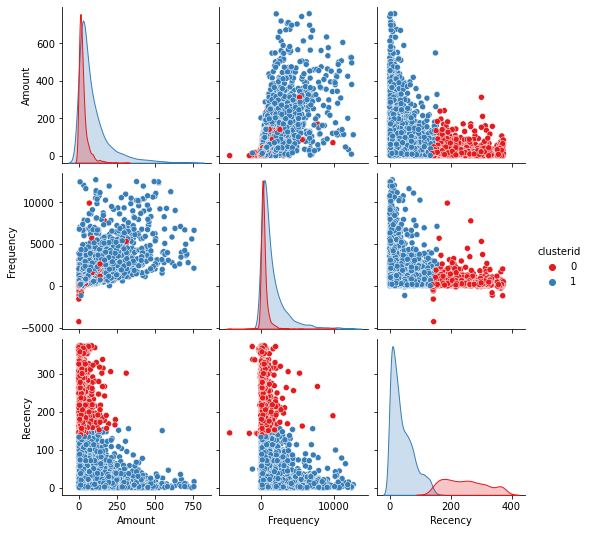

In [40]:
sns.pairplot(rfm_final,hue='clusterid',palette='Set1');

In [56]:
km.predict([[60,10,0]])

array([1])

In [60]:
km.predict([[90,80,950]])

array([0])